# To get started with Data Understanding:
>Kaggle Link:
https://www.kaggle.com/competitions/higgs-boson/data
>
>Journal Article about the dataset (*Documentation about this data is good.*):
https://proceedings.mlr.press/v42/cowa14.pdf
>
>Offical dataset (*if you don't want to use Kaggle*):
https://opendata.cern.ch/record/328

Type this into your notebook:
>>`!curl -O https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz`
>>
>>`!ls`
>>
>>`!gunzip 'atlas-higgs-challenge-2014-v2.csv.gz'`


In [1]:
!curl -O https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62.5M  100 62.5M    0     0  5555k      0  0:00:11  0:00:11 --:--:-- 12.5M


In [2]:
!ls # sanity check.

atlas-higgs-challenge-2014-v2.csv.gz  sample_data


In [3]:
!gunzip 'atlas-higgs-challenge-2014-v2.csv.gz'

In [4]:
!ls # sanity check.

atlas-higgs-challenge-2014-v2.csv  sample_data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv')
df.drop(['KaggleSet', 'KaggleWeight', 'EventId'], axis=1, inplace=True) # drop columns that we may not need.

In [7]:
df.head(5) # sanity check

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b


#### By running this code, we can identify where to start our filtering for signal and background

In [8]:
df.Label.unique()

array(['s', 'b'], dtype=object)

### Import necessary ML libraries.

In [9]:
import sklearn.discriminant_analysis as DA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

### I looped through the names to get VarNames. Excluding `Label` which contains the sig/bkg

In [12]:
VarNames=list()
for col in df.columns:
  if col == 'Label':
    continue
  else:
    VarNames.append(col)

VarNames
# Note: After reading the article: "The subject of the Challenge
# was to study the H to tau tau channel."
# So maybe we only look at ['DER_pt_h','DER_deltar_tau_lep','DER_pt_ratio_lep_tau','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi']

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight']

In [11]:
N = len(df) # total size of data.
Train_sample=df[:round(N * .8)] # training sample size.
Test_sample=df[round(N * .8):] # testing sample size.

X_Train=Train_sample[VarNames] # EXPLANATORY training sample of every other feature that is not sig/bkg.
y_Train=Train_sample["Label"] # RESPONSE training sample of every other feature that is not sig/bkg.

X_Test=Test_sample[VarNames] # EXPLANATORY testing sample of every other feature that is not sig/bkg.
y_Test=Test_sample["Label"] # RESPONSE testing sample of every other feature that is not sig/bkg.

Test_sig=Test_sample[Test_sample.Label=='s'] # filter specifically for signal. And use this as a test for signal.
Test_bkg=Test_sample[Test_sample.Label=='b'] # filter specifically for background. And use this as a test for background.

Basic TPR and FPR of a feature on a single plot

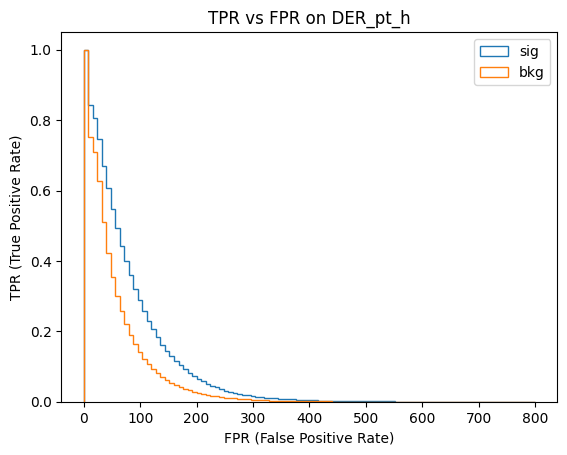

In [16]:
TPR_Test, bins_sig_test,_=plt.hist(Test_sig['DER_pt_h'], bins=100, histtype='step',
                                   cumulative=-1, density=True, label='sig')
FPR_Test, bins_sig_test,_=plt.hist(Test_bkg['DER_pt_h'], bins=bins_sig_test,
                                   histtype='step', cumulative=-1, density=True, label='bkg')
plt.title('TPR vs FPR on DER_pt_h')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

Pair Plot of all VarNames

In [31]:
import matplotlib.pyplot as plt

def plot_features(Test_sig, Test_bkg, VarNames, bins=100):
    n_features = len(VarNames)
    ncols = 2
    nrows = (n_features + 1) // ncols  # arrange in 2-column grid

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 2.5*nrows))
    axes = axes.flatten()  # flatten for easy indexing

    for i, var in enumerate(VarNames):
        ax = axes[i]

        # Signal histogram
        TPR_Test, bins_sig_test, _ = ax.hist(
            Test_sig[var], bins=bins, histtype='step',
            cumulative=-1, density=True, label='sig'
        )

        # Background histogram (same bins as signal)
        FPR_Test, _, _ = ax.hist(
            Test_bkg[var], bins=bins_sig_test, histtype='step',
            cumulative=-1, density=True, label='bkg'
        )

        ax.set_title(f'TPR vs FPR on {var}')
        ax.set_xlabel('FPR (False Positive Rate)')
        ax.set_ylabel('TPR (True Positive Rate)')
        ax.legend()

    # Hide unused subplots if VarNames length is odd
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


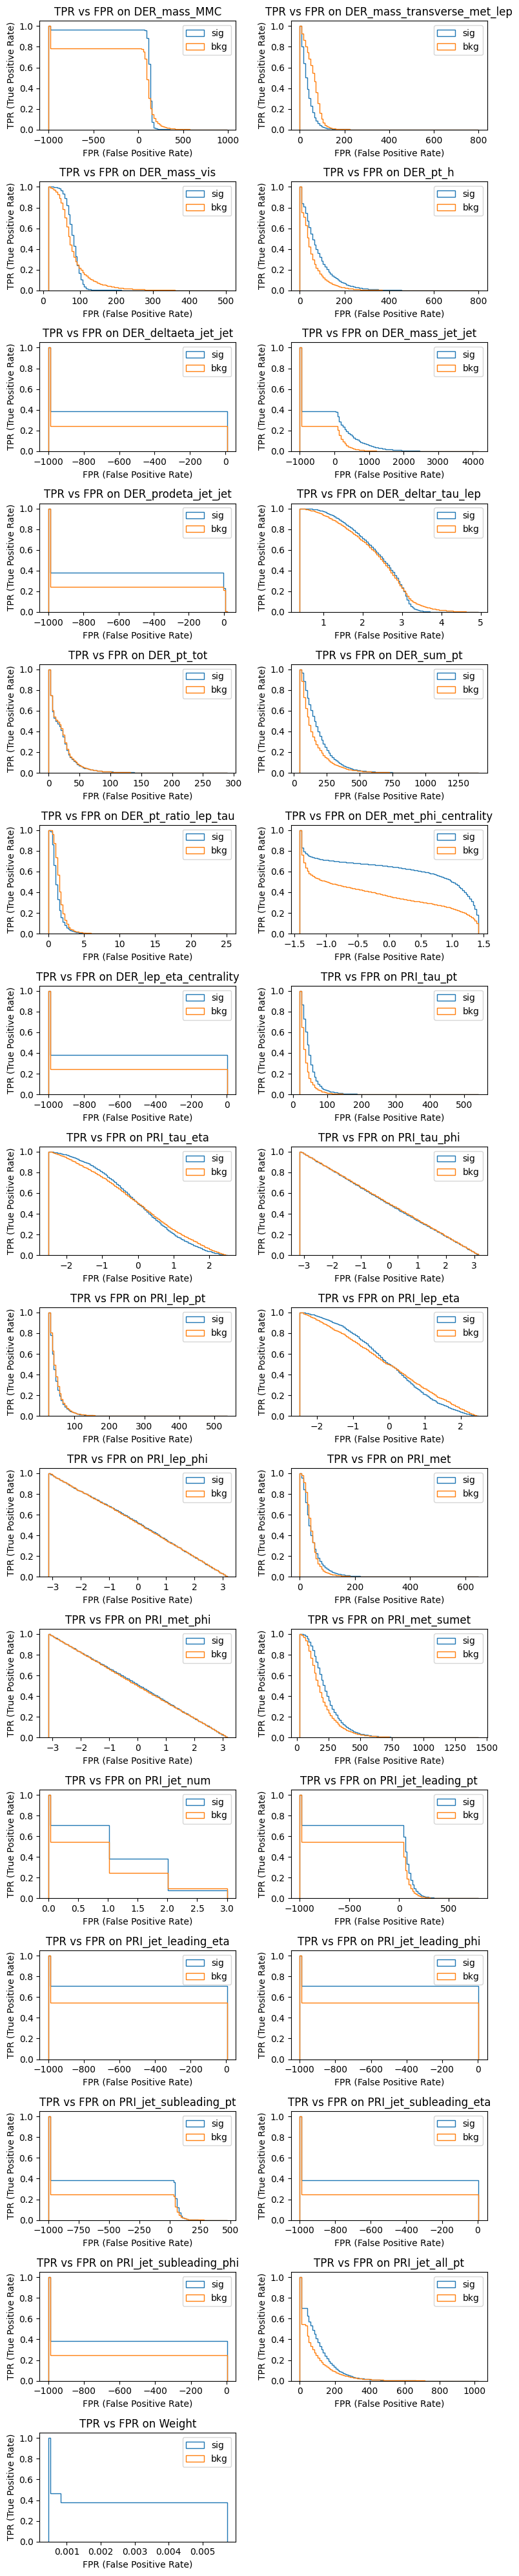

In [32]:
plot_features(Test_sig, Test_bkg, VarNames)